In [1]:
# Pandas
import pandas as pd
import os
from dotenv import load_dotenv

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
# If Password Changes . . . 

load_dotenv()

True

In [3]:
# Getting Variable In Enviroment 

url = os.environ.get("DATABASE_URL")

In [4]:
# Creating And Connecting Engine 

engine = create_engine(url)
conn = engine.connect()

In [5]:
# Reading SQL 

salaries_df = pd.read_sql("SELECT employee_id, salary FROM salaries", conn)

In [6]:
# Checking Data Frame 

salaries_df

,employee_id,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
# Checking Data Types
# salaries_df.dtypes

In [8]:
max_salary = salaries_df['salary'].max()

# max_salary

In [9]:
min_salary = salaries_df['salary'].min()

# min_salary

In [10]:
# Creating Variables 

bins = [min_salary, 49999, 59999, 69999, 79999, 89999, 99999, 109999, 119999, max_salary]
group_names = ["40K-50K","50K-60K","60K-70K","70K-80K","80K-90K","90K-100K","100K-110K","110K-120K","120K+"]

In [11]:
# Creating Column

salaries_df["Total Count"] = pd.cut(salaries_df["salary"], bins, 
                                    labels=group_names, include_lowest=True)

In [12]:
# Counting Number Of Employees In Each Salary Range 

salaries_count = salaries_df["Total Count"].value_counts()

# salaries_count

In [13]:
# DataFrame Of Number Of Employees In Each Salary Range 

salaries_count_df = pd.DataFrame(salaries_count)
salaries_count_df

,Total Count
40K-50K,158465
50K-60K,57915
60K-70K,41413
70K-80K,24814
80K-90K,11845
90K-100K,4284
100K-110K,1069
110K-120K,195
120K+,24


Text(0.5, 1.0, 'Most Common Salary Ranges')

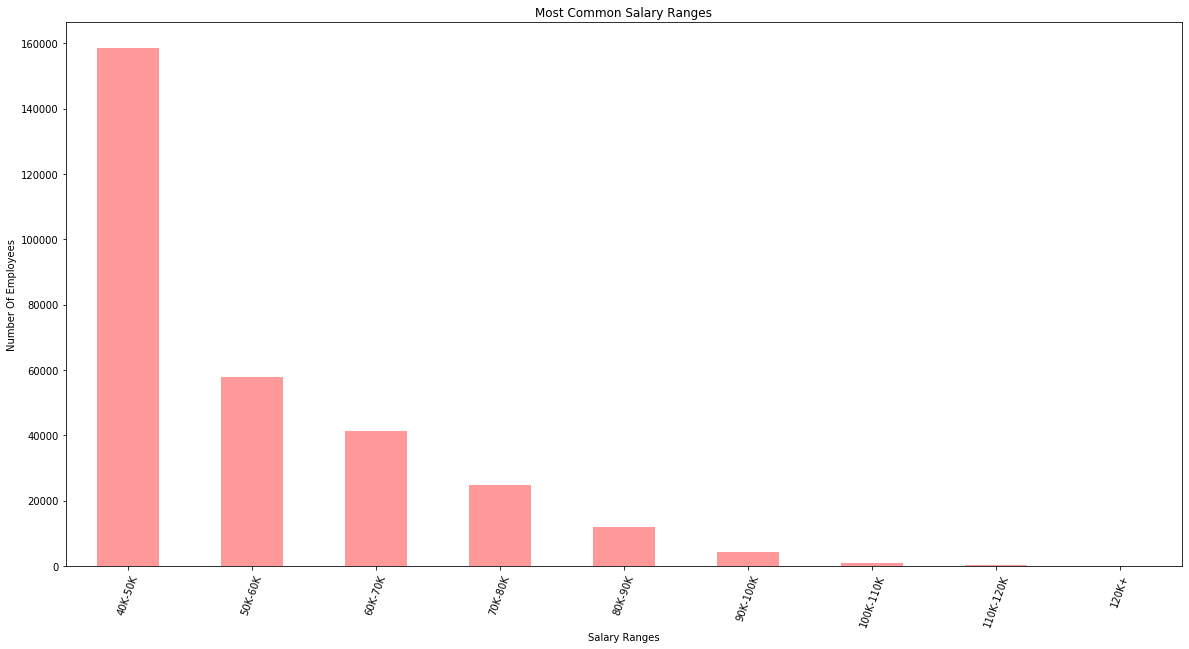

In [14]:
# Creating Histogram Through Plot.Bar()

ax1 = salaries_count.plot.bar(rot=70,figsize=(20,10), color='red', alpha = 0.4)
ax1.set_xlabel('Salary Ranges')
ax1.set_ylabel('Number Of Employees')
ax1.set_title('Most Common Salary Ranges')

In [15]:
# Reading SQL
# https://www.programcreek.com/python/example/101381/pandas.read_sql

average_salaries_df = pd.read_sql("""SELECT t.title_name, ROUND(AVG(s.salary),2) AS average_salary
FROM employees_info AS ei 
INNER JOIN salaries AS s ON
s.employee_id = ei.employee_id 
INNER JOIN Titles AS t ON
t.title_id = ei.employee_title_id
GROUP BY t.title_name; """, conn)

In [16]:
# Checking Data Frame 

average_salaries_df

,title_name,average_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


In [17]:
# Setting Title Name To Index

title_name_index_df = average_salaries_df.set_index('title_name')

Text(0.5, 1.0, 'Average Salary By Title')

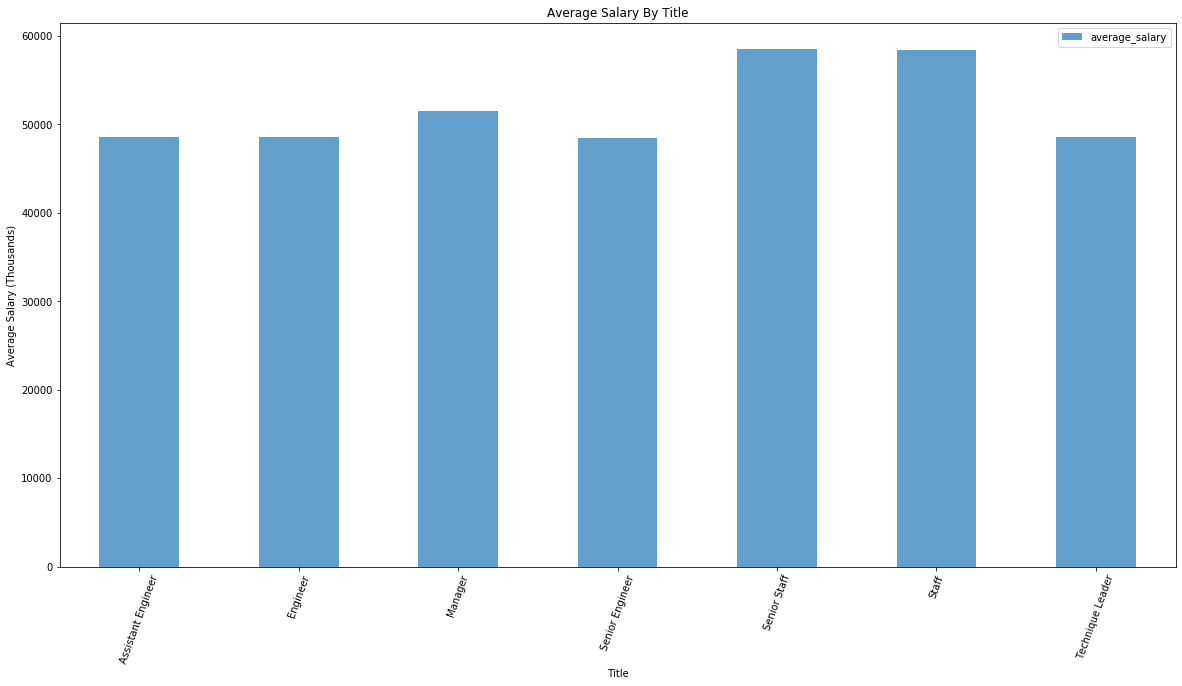

In [18]:
# Generate Average Salary Bar Chart From Data Frame 

ax2 = title_name_index_df.plot.bar(rot=70,figsize=(20,10), alpha = 0.7)
ax2.set_xlabel('Title')
ax2.set_ylabel('Average Salary (Thousands)')
ax2.set_title('Average Salary By Title')